## Geopandas tutorial

In [2]:
import geopandas as gpd

world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

## 로컬에서 불러오기

In [21]:
import geopandas as gpd 
states = gpd.read_file('data/map/ne_110m_admin_1_states_provinces.shp')
states[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(6)

adm1_code iso_3166_2          name  \
0  USA-3514      US-MN     Minnesota   
1  USA-3515      US-MT       Montana   
2  USA-3516      US-ND  North Dakota   
3  USA-3517      US-HI        Hawaii   
4  USA-3518      US-ID         Idaho   
5  USA-3519      US-WA    Washington   

                                            geometry  
0  POLYGON ((-89.95766 47.28691, -90.13175 47.292...  
1  POLYGON ((-116.04823 49.00037, -113.05950 49.0...  
2  POLYGON ((-97.22894 49.00089, -97.21414 48.902...  
3  MULTIPOLYGON (((-155.93665 19.05939, -155.9080...  
4  POLYGON ((-116.04823 49.00037, -115.96780 47.9...  
5  POLYGON ((-117.03143 48.99931, -117.02665 47.7...

In [22]:
print(type(states))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [17]:
states.shape

(51, 122)

In [18]:
states.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

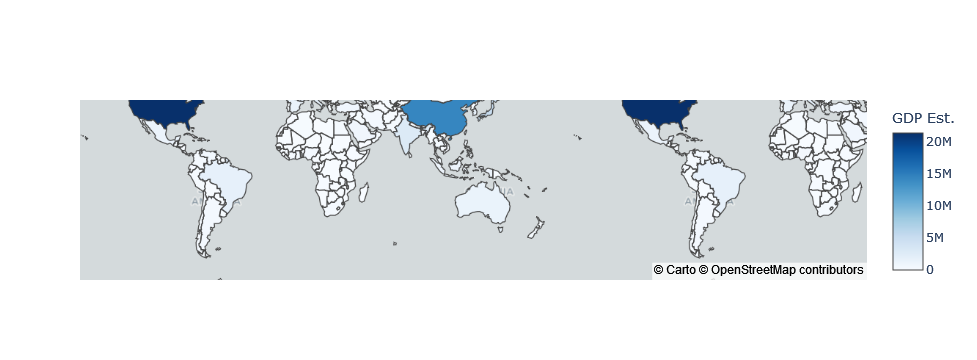

In [1]:
import geopandas as gpd
import plotly.graph_objs as go

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig = go.Figure()

fig.add_trace(go.Choroplethmapbox(
    geojson=world.geometry.__geo_interface__,
    locations=world.index,
    z=world['gdp_md_est'],
    colorscale='Blues',
    colorbar_title='GDP Est.'
))

fig.update_layout(
    mapbox_style='carto-positron',
    mapbox_center={'lat':0, 'lon':0},
    mapbox_zoom=2
)

fig.show()

- https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e

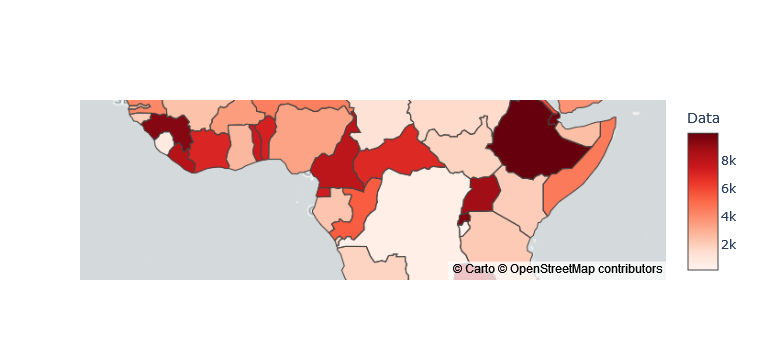

In [2]:
import geopandas as gpd
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the world map shapefile from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a random data DataFrame
data = pd.DataFrame({
    'Country': world['name'],
    'Data': np.random.randint(100, 10000, len(world))
})

# Create a Plotly figure object
fig = go.Figure()

# Add a choropleth map trace to the figure using the world map GeoDataFrame
fig.add_trace(go.Choroplethmapbox(
    geojson=world.geometry.__geo_interface__,
    locations=world.index,
    z=data['Data'],
    colorscale='Reds',
    colorbar_title='Data'
))

# Update the layout of the figure to show a world map centered at (0, 0)
fig.update_layout(
    mapbox_style='carto-positron',
    mapbox_center={'lat':0, 'lon':0},
    mapbox_zoom=2
)

# Define the hover text of the map trace to show the country name and data
hover_text = []
for index, row in world.iterrows():
    country_name = row['name']
    if country_name in data['Country'].values:
        data_value = data.loc[data['Country'] == country_name, 'Data'].values[0]
        hover_text.append(f'{country_name}<br>Data: {data_value}')
    else:
        hover_text.append(country_name)
fig.data[0].hovertext = hover_text

def on_click(trace, points, state):
    if points.point_inds:
        country_name = world.loc[points.point_inds[0], 'name']
        if country_name in data['Country'].values:
            data_value = data.loc[data['Country'] == country_name, 'Data'].values[0]
            print(f'{country_name}: {data_value}')
        else:
            print(f'No data available for {country_name}')

# Register the callback function to the map trace
fig.data[0].on_click(on_click)

# Show the Plotly figure
fig.show()

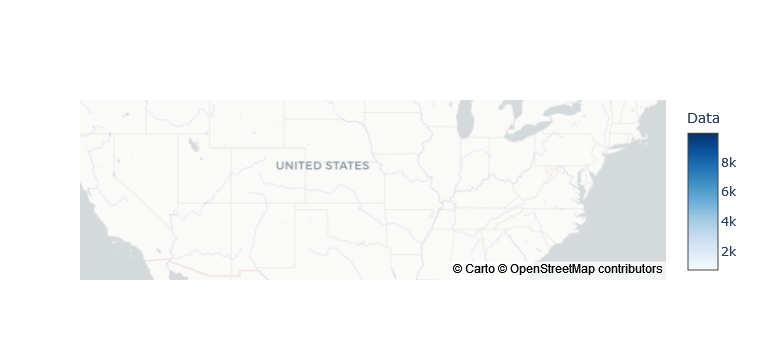

In [5]:
import geopandas as gpd
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the US map shapefile from geopandas datasets
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[172]

# Create a random data DataFrame
data = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Data': np.random.randint(100, 10000, 50)
})

# Create a Plotly figure object
fig = go.Figure()

# Add a choropleth map trace to the figure using the US map GeoDataFrame
fig.add_trace(go.Choroplethmapbox(
    geojson=usa.geometry.__geo_interface__,
    locations=data['State'],
    z=data['Data'],
    colorscale='Blues',
    colorbar_title='Data',
    marker_opacity=0.5,
    marker_line_width=0,
    zmax=10000
))

# Update the layout of the figure to show a US map centered at (-96, 38)
fig.update_layout(
    mapbox_style='carto-positron',
    mapbox_center={'lat':38, 'lon':-96},
    mapbox_zoom=3
)

# Define the hover text of the map trace to show the state name and data
hover_text = []
for index, row in data.iterrows():
    state_name = row['State']
    data_value = row['Data']
    hover_text.append(f'{state_name}<br>Data: {data_value}')
fig.data[0].hovertext = hover_text

# Define a callback function to print the clicked state and its data value
def on_click(trace, points, state):
    if points.point_inds:
        state_name = data.loc[points.point_inds[0], 'State']
        data_value = data.loc[points.point_inds[0], 'Data']
        print(f'{state_name}: {data_value}')

# Register the callback function to the map trace
fig.data[0].on_click(on_click)

# Show the Plotly figure
fig.show()